In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


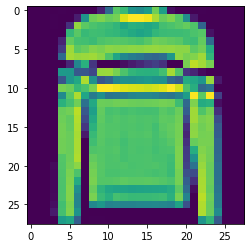

In [2]:
import pandas as pd
import numpy as np

plt.imshow(x_train[5])

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
import cv2 as cv

cv.imshow('', x_train[0])
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
x_train[0].shape

(28, 28, 1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [10]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

model.save_weights('model.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 427us/step - loss: 0.4632 - accuracy: 0.8396 - val_loss: 0.3554 - val_accuracy: 0.8677
Epoch 2/5
60000/60000 [==============================] - 22s 370us/step - loss: 0.3018 - accuracy: 0.8944 - val_loss: 0.2839 - val_accuracy: 0.8958
Epoch 3/5
60000/60000 [==============================] - 23s 377us/step - loss: 0.2472 - accuracy: 0.9126 - val_loss: 0.2881 - val_accuracy: 0.8998
Epoch 4/5
60000/60000 [==============================] - 23s 377us/step - loss: 0.2136 - accuracy: 0.9233 - val_loss: 0.2690 - val_accuracy: 0.9073
Epoch 5/5
60000/60000 [==============================] - 23s 378us/step - loss: 0.1863 - accuracy: 0.9322 - val_loss: 0.2582 - val_accuracy: 0.9093


In [10]:
model.load_weights('model.h5')

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 3s 316us/step
Test accuracy: 0.9093000292778015


In [12]:
predictions = model.predict(x_test)

In [13]:
predictions[4]

array([1.2789208e-01, 4.0810949e-07, 3.7807638e-03, 1.0128927e-04,
       2.0680811e-04, 3.0480378e-09, 8.6800563e-01, 7.5382517e-10,
       1.2904101e-05, 2.4478033e-09], dtype=float32)

In [14]:
cv.imshow('', x_test[4])
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
y_test[4]

6

In [35]:
import cv2

img = cv2.imread('trousers.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28),1)

In [36]:
cv2.imshow('image',img/255)
cv2.waitKey(0)
cv2.destroyAllWindows()

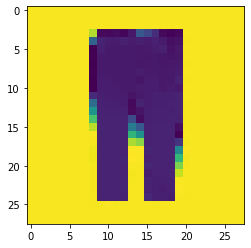

In [38]:
plt.imshow(img/255)

In [39]:
img = img.reshape(28,28,1)

In [40]:
 predicted = model.predict(np.array([img])/255)

In [41]:
if predicted.argmax() == 0:
    print ('T-shirt')
elif predicted.argmax() == 1:
    print ('Trouser')
elif predicted.argmax() == 2:
    print ('Pullover')
elif predicted.argmax() == 3:
    print ('Dress')
elif predicted.argmax() == 4:
    print ('Coat')
elif predicted.argmax() == 5:
    print ('Sandal')
elif predicted.argmax() == 6:
    print ('Shirt')
elif predicted.argmax() == 7:
    print ('Sneaker')
elif predicted.argmax() == 8:
    print ('Bag')
elif predicted.argmax() == 8:
    print ('Ankle boot')

Sandal
